在这次实验中，我们将使用支持向量机（SVM）来构建垃圾邮件分类器。给定的数据集是具有2D特征的样本。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

## Task1

In [2]:
raw_data = loadmat('data/ex6data1.mat')
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:43 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[1.9643  , 4.5957  ],
        [2.2753  , 3.8589  ],
        [2.9781  , 4.5651  ],
        [2.932   , 3.5519  ],
        [3.5772  , 2.856   ],
        [4.015   , 3.1937  ],
        [3.3814  , 3.4291  ],
        [3.9113  , 4.1761  ],
        [2.7822  , 4.0431  ],
        [2.5518  , 4.6162  ],
        [3.3698  , 3.9101  ],
        [3.1048  , 3.0709  ],
        [1.9182  , 4.0534  ],
        [2.2638  , 4.3706  ],
        [2.6555  , 3.5008  ],
        [3.1855  , 4.2888  ],
        [3.6579  , 3.8692  ],
        [3.9113  , 3.4291  ],
        [3.6002  , 3.1221  ],
        [3.0357  , 3.3165  ],
        [1.5841  , 3.3575  ],
        [2.0103  , 3.2039  ],
        [1.9527  , 2.7843  ],
        [2.2753  , 2.7127  ],
        [2.3099  , 2.9584  ],
        [2.8283  , 2.6309  ],
        [3.0473  , 2.2931  ],
        [2.4827  , 2.0373  ],
        [2.5057 

In [16]:
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
data['y'] = raw_data.get('y')

data.head()

,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


## Visualization

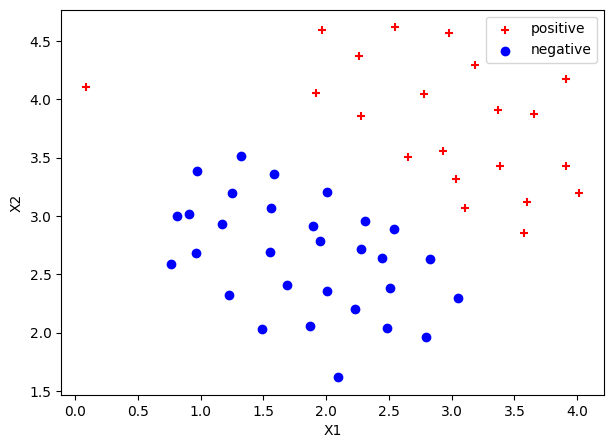

In [18]:
positive = data[data.y == 1]
negative = data[data.y == 0]

fig, ax = plt.subplots(figsize=(7, 5))
ax.scatter(positive['X1'], positive['X2'], label='positive', marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', marker='o', c='b')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.legend(loc='best')

plt.show()

可以注意到除了有一个正样本比较异常外，其他的正负样本都可以采用线性决策边界来区分

我们直接调用scikit-learn来实现分类

## try C = 1

In [29]:
from sklearn import svm
svc1 = svm.LinearSVC(C=1, loss='hinge', max_iter=5000, dual=True)
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.9803921568627451

## decision boundary

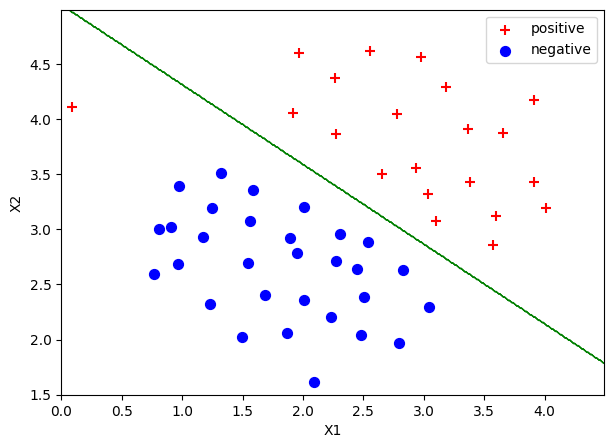

In [35]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(1.5, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)

# 生成网格数据并转换为DataFrame（需与训练数据列名一致）
xx = np.vstack((x1.ravel(), x2.ravel())).T
xx_df = pd.DataFrame(xx, columns=['X1', 'X2'])  # 列名需与训练数据一致

y_pred = svc1.predict(xx_df).reshape(x1.shape)
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

查看每个样本的置信水平，这是点与超平面的距离函数

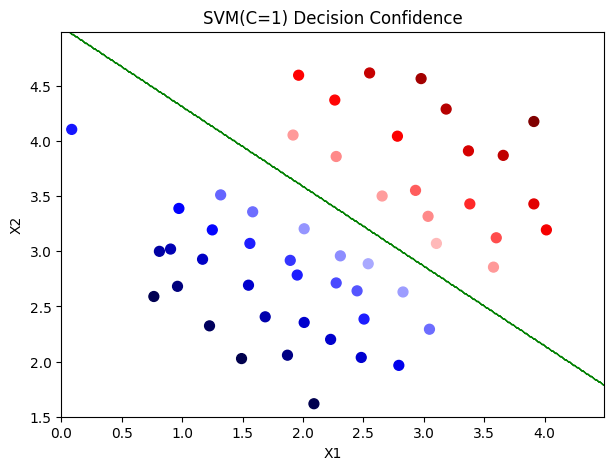

In [38]:
# The confidence score for a sample is the signed distance of that sample to the hyperplane.
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='seismic')
ax.set_title('SVM(C=1) Decision Confidence')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(1.5, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)

# 生成网格数据并转换为DataFrame（需与训练数据列名一致）
xx = np.vstack((x1.ravel(), x2.ravel())).T
xx_df = pd.DataFrame(xx, columns=['X1', 'X2'])  # 列名需与训练数据一致

y_pred = svc1.predict(xx_df).reshape(x1.shape)
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

可以看出这个结果已经非常好了，正负样本与决策边界都具有较大的间距

## try C = 100

$C$ 越大，模型就越容易过拟合

In [47]:
svc2 = svm.LinearSVC(C=400, loss='hinge', max_iter=20000, dual=True)
svc2.fit(data[['X1', 'X2']], data['y'])
svc2.score(data[['X1', 'X2']], data['y'])

C:\Users\youthPaul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


1.0

## decision boundary

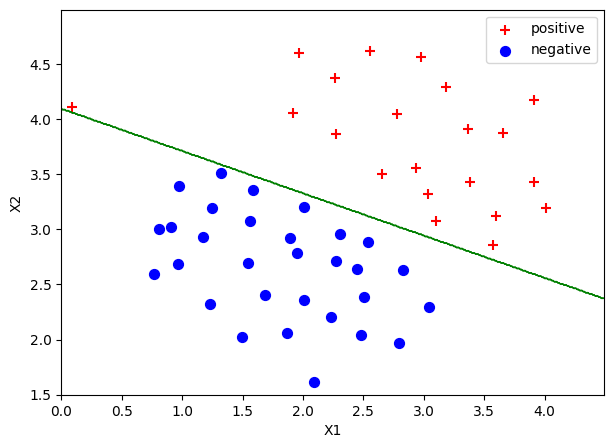

In [48]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(positive['X1'], positive['X2'], label='positive', s=50, marker='+', c='r')
ax.scatter(negative['X1'], negative['X2'], label='negative', s=50, marker='o', c='b')
ax.legend(loc='best')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# 决策边界, 使用等高线表示
x1 = np.arange(0, 4.5, 0.01)
x2 = np.arange(1.5, 5, 0.01)
x1, x2 = np.meshgrid(x1, x2)

# 生成网格数据并转换为DataFrame（需与训练数据列名一致）
xx = np.vstack((x1.ravel(), x2.ravel())).T
xx_df = pd.DataFrame(xx, columns=['X1', 'X2'])  # 列名需与训练数据一致

y_pred = svc2.predict(xx_df).reshape(x1.shape)
plt.contour(x1, x2, y_pred, colors='g', linewidths=.5)

plt.show()

从结果来看，很明显就是**过拟合**了，将那个异常的正样本都正常分类

而且SVM的结果并不好，正负样本距离决策边界都过近